# Introduction

In this tutorial, we will develop a model of paired associates learning as described in the standard ACT-R tutorial. This model differs from other models in the tutorial series in that the trials are not independent as a result of learning and forgetting. 

## Task

Over the course of eight blocks,  subjects learn paired associates consisting of a word paired with a unique number. In each block, the same 20 paired associates are presented in a randomized order. On each trial, the word component of a randomly selected paired associate is presented for five seconds. Subjects are instructed to press the number key associated with the word. In contrast to the task described in the standard ACT-R tutorial, subjects are asked to press a designated key in the event of a retrieval failure as opposed to omitting a response. This modification to the task can improve the estimation of the retrieval threshold. After the five second deadline, the corresponding number is presented as feedback for a duration of five seconds. 

# Paired Associates Model

On each trial, the model visually encodes the word associate and creates a chunk in the imaginal buffer representing the paired associate for the current trial. After visual encoding, the word is added to the word slot of the chunk in the imaginal buffer and the model attempts to retrieve a chunk with the word associate in the word slot. If the chunk is retrieved, the model responds with the corresponding number located in the number slot of the retrieved chunk. The model responds with a a designated key in the case of a retrieval failure. After the five second deadline, the number associate is presented as feedback and the model visually encodes and adds the number to the number slot of the chunk in the imaginal buffer. The chunk is then cleared from the imaginal buffer, at which time the number of uses for that chunk is incremented by one. In some small number of cases, the response is truncated because the deadline is exceeded. In such cases, the model omits a response and proceeds to process the feedback.


## Declarative memory

Let $M$ denote the set chunks in declarative memory, where  $n_{\rm items}$ represents the number of associative pairs used in the experiment. $M$ is empty at the beginning of the experiment. New chunks are added to $M$ as they are encountered. Each chunk consists of the following set of slots: $Q= \rm \{word,number\}$. 

### Encoding

On each trial, a word $v$ is presented on a screen and the model encodes the stimulus into a chunk that is stored in the imaginal buffer. Formally, we define the encoded chunk as:

\begin{align}
\mathbf{c}_{s,\rm \textrm{imaginal}} = \{ (\rm word, v)\}
\end{align}

The process of encoding requires .05 seconds for conflict resolution, .085 seconds to shift attention, and .200 to create a new chunk in the imaginal buffer. The time to create a new chunk in the imaginal buffer will be ignored for simplicity because it happens conccurently with a memory retrieval, which is typically slower. Thus, the .200 seconds tends not to influence the processing time dynamics of the model. 

### Retrieval Request

The retrieval request is defined as:

\begin{align}
\mathbf{r} = \{(\textrm{word},c_{s,\rm imaginal}(\rm word)\} 
\end{align}

where $c_{s,\rm imaginal}(\rm word)$ is the word value of the chunk in the imaginal buffer. The slot set for the retrieval request is defined as $Q_r = \rm \{word\}$ 

### Response Mapping

We define resp $\in \{0,1,2,\cdots, 9, \emptyset, \textrm{uk} \}$ as the response. As before, uk indicates a retrieval failure. $\emptyset$ denotes a case in which a response failed to meet the five second deadline. The mapping between the retrieval outcome and the observed response is:
\begin{align*}
c_{\rm resp} &= \mathbf{c}\in M : c(\rm number) = \textrm{resp}  &\textrm{ for resp }\ne \textrm{uk} \textrm{ and rt } < 5\\
c_{\rm uk} &= \mathbf{c}_{m^\prime}  & \textrm{ rt } < 5.
\end{align*}
where $|R_{\rm resp}| = 1$ because the response mapping is one-to-one. If a chunk is retrieved, it is cleared from the buffer as soon as the response production rule is executed and $N_m$ is incremented by 1. After encoding the feedback, the imaginal buffer is cleared and $N_m$ is incremented by 1 and the  timestamp $t_{m}$ is updated with the current simulated time. 


## Activation

Activation for chunk $m$ is defined as:

\begin{align}
a_m = \textrm{blc} + \epsilon_m
\end{align}

where bll is base level learning, and $\epsilon_m \sim \rm normal(0, \sigma)$ is normally distributed noise. 
Base level learning captures the dynamics of learning and forgetting. As a chunk is used more, activation increases. By contrast, as the time elapsed between uses increases, activation decays. We use the hybrid approximation to base-level learning because it reduces computational complexity with little sacrifice in terms of (Petrov, 2006, Fisher et al., 2018). The hybrid approximation tracks the exact time stamps of the last $k$ uses of each chunk. Previous analyses of the hybrid approximation has demonstrated that setting $k=1$ produces a highly accurate approximation (Petrov, 2006, Fisher et al., 2018). Without loss of generalizability, we present a simplified version of the hybrid approximation in which $k=1$: 
\begin{equation}
\textrm{bll}_m \approx  \ln\left(t_{m}^{-d} + \frac{(N_m-1)(L_m^{1-d} - t_{m}^{1-d}) }{(1-d)(L_m - t_{m})}\right)
\end{equation}
where $d \in [0,1]$ is the decay parameter, $L_m$ is the time since the creation of chunk $m$, $N_m$ is the number of uses of chunk $m$, and $t_{m}$ is the time since the last use of chunk $m$. 

## Conflict resolution and perceptual-motor time

We will fix $t_{\rm er}$ to the following value based on the default ACT-R parameters 

\begin{align}
 t_\textrm{er} = \rm (cr + e) + cr + (cr + me) = .535 
\end{align}

where cr is the default conflict resolution time of .05 seconds, $e$ is the default encoding time of .085 seconds and me is the approximate motor execution time of .300 seconds. 

## Likelihood Function

The likelihood function consists of two components. The following component is used when a response is given: 
\begin{eqnarray}\label{eq:LNR_paired}
\mathcal{L}(\Theta; \textrm{resp},\textrm{rt})
= f(\textrm{rt}; -\mu_{\rm resp} + \upsilon, \sigma)\left[1-G(\textrm{rt}; -\mu_{m'} + \upsilon, \sigma)\right]\\
\mathcal{L}(\Theta; \textrm{uk}, \textrm{rt})
= f(\textrm{rt}; -\mu_{m'} + \upsilon, \sigma)\left[1-G(\textrm{rt}; -\mu_{\rm resp} + \upsilon, \sigma)\right],
\end{eqnarray}
where $\Theta$ represents the set of model parameters. The other component applies when a response is not given.  Formally, the probability of failing to respond within the deadline is defined as: 
\begin{equation}\label{eq:truncate}
\textrm{Pr}(\textrm{resp}=\emptyset) = \left[1-G(5 \mid -\mu_{\rm resp} + \upsilon,\sigma)\right]\left[1-G(5 \mid -\mu_{\rm uk} + \upsilon,\sigma)\right]
\end{equation}

Next, we will generate some simulated data to use for parameter estimation. First, we will load the required packages and functions.

In [1]:
# change directory of this file
cd(@__DIR__)
# pakcage manager
using Pkg
# activate this environment of this project
Pkg.activate("../../")
# load dependencies
using Turing, DataFrames, StatsPlots, Revise, ACTRModels
# load stimuli
include("Stimuli.jl")
# load model functions
include("Paired_Model.jl")
# set seed for RNG
Random.seed!(589)

  Activating environment at `~/.julia/dev/ACTRFundamentalTools/Project.toml`


MersenneTwister(589)

# Generate Data

The data generation process is comprised of the following three functions:

- `simulate`: top-level function that runs the simulation
- `simulate_block`: iterates through a block of trials 
- `simulate_trial`: simulates the model for a single trial


The function `simulate` simulates the experiment for a specified number of blocks and trials within blocks. `simulate` accepts the following arguments:

- `all_stimuli`: all 20 word-number pairs
- `fixed_parms`: a `NamedTuple` of fixed parameters in the model
- `n_blocks`: the number of blocks in the experiment
- `n_trials`: the number of trials in each block, which is also the number of unique paired associates
- `deadline`: the deadline for responding
- `isi`: length of inter-stimulus interval during which the number associate is presented as feedback
- `d`: keyword argument for decay parameter

`simulate` performs the following steps. First, it selects a subset of paired associates based on `n_trials` with a max of 20. Next, the model is initialized with empty declarative memory and the parameters specified in `fixed_parms` and `d`. Finally, it iterates through each block of trials, calling `simulate_block` each time. Inside the block loop, the current time is updated with `set_time!` and simulated data is added to the array called `data`.

The function `simulate_block` iterates through a block of trials and requires the following inputs:

- `actr`: ACT-R model object
- `stimuli`: a randomized set of paired associates, one for each trial
- `cur_time`: the current time in the simulation
- `block`: current block number
- `deadline`: the deadline for responding
- `isi`: length of inter-stimulus interval during which the number associate is presented as feedback

In `simulate_block`, the array `data` stores the simulated data for the current block of trials. The for loop iterators through the paired associates for the current block of trials and advanced the time by 10 seconds after each loop because a new trial always begins after 10 seconds. 

Finally, `simulate_trial` executes the simulation for a single trial. `simulate_trial` requires the following inputs:

- `actr`: ACT-R model object
- `stimulus`: a paired associate
- `block`: current block number
- `cur_time`: the current time in the simulation
- `deadline`: the deadline for responding

`simulate_trial` performs the following basic functions: execute a retreival attempt, handle the response and data, and process the feedback following the 5 second deadline. Throughout the process, time is incremented with the function `add_time!` The function `retrieve` submits a retrieval request for a chunk containing a slot for the presented word. 

The following block of if statements handles the data recording and updating of the chunks. If the rt is greater than the deadline, the response is classified as truncated. Next, if a chunk is retrieved, the number of uses is updated and the response is classified as retrieved. Finally, if a retrieval failure occurs, the response is classified as failure. 

In the last part of `simulate_trial`, the model encodes the number associate and `cur_time` is incremented accordingly. Finally, the number of uses is incremented for the correct chunk. 

All three functions are annotated below:

In [3]:
function simulate(all_stimuli, fixed_parms, n_blocks, n_trials, deadline=5.0, isi=5.0; d)
    # sample unique stimului for the simulation
    stimuli = sample_stimuli(all_stimuli, n_trials)
    # initialize declarative memory
    chunks = [Chunk(word=:_,number=1)] |> empty!
    memory = Declarative(;memory=chunks)
    # create act-r object
    actr = ACTR(;declarative=memory, fixed_parms..., d)
    # preallocate data
    data = Array{NamedTuple,1}()
    # iterate through all blocks
    for block in 1:n_blocks
        # randomize stimulus order
        shuffle!(stimuli)
        temp = simulate_block(actr, stimuli, block, deadline, isi)
        push!(data, temp...)
    end
    return vcat(data...)
end

function simulate_block(actr, stimuli, block, deadline=5.0, isi=5.0)
    # initialize data for the current block
    data = Array{NamedTuple,1}()
    start_time = get_time(actr)
    for stimulus in stimuli
        temp = simulate_trial(actr, stimulus, block, deadline)
        push!(data, temp)
        # 5 second response deadline + additional 5 seconds
        start_time += (deadline + isi) 
        set_time!(actr, start_time)
    end
    return data
end

function simulate_trial(actr, stimulus, block, deadline=5.0)
    N=0;L=0.0;recent=Float64[];retrieved=:failed;time_created=0.0
    trial_start = get_time(actr)
    # encode and conflict resolution time
    e_time = 0.085 + 0.05 + 0.05
    add_time!(actr, e_time)
    # retrieve paired associate based on word
    chunk = retrieve(actr; word=stimulus.word)
    # retrieval time 
    r_time = compute_RT(actr, chunk)
    # add encoding time and retrieval time to reaction time
    rt = e_time + r_time + .05 + 0.300
    # interrupt retrieval if exceeds deadline
    if rt > deadline
        # set to truncated value
        rt = deadline
        # advance current time to deadline
        set_time!(actr, trial_start + deadline)
        retrieved = :truncated
        # retrieval info if no chunk is retrieved
        chunk = get_chunks(actr; stimulus...)
        if !isempty(chunk)
            # get chunk state at time of retrieval
            @unpack N,L,recent,time_created = chunk[1]
            recent = copy(recent)
        end
    elseif !isempty(chunk)
        # add retreival time to current time
        add_time!(actr, r_time)
        # next conflict resolution
        add_time!(actr, .05)
        retrieved = :retrieved
        # get chunk state at time of retrieval
        @unpack N,L,recent,time_created = chunk[1]
        recent = copy(recent)
        # add chunk if new, or update N and time stamps
        add_chunk!(actr; stimulus...)
    else
        # add retreival failure time to current time
        add_time!(actr, r_time)
        # next conflict resolution
        add_time!(actr, .05)
        # retrieval info if no chunk is retrieved
        chunk = get_chunks(actr; stimulus...)
        if !isempty(chunk)
            # get chunk state at time of retrieval
            @unpack N,L,recent,time_created = chunk[1]
            recent = copy(recent)
        end
    end
    # feedback is always presented after the deadline
    set_time!(actr, trial_start + deadline)
    # encode feedback
    add_time!(actr, 0.05 + 0.05 + 0.085)
    # add chunk: create new chunk if does not exist, otherwise increment N and add time stamp
    add_chunk!(actr; stimulus...)
    data = (stimulus=stimulus,N=N,L=L,block=block,time_created=time_created,
        recent=recent,rt=rt,retrieved=retrieved)
    return data
end

simulate_trial (generic function with 2 methods)

It is possible to reverse engineer the memory state prior to each response based on timestamps and assumptions of the model. To eliminate this post-processing step, we will record the memory state in the data generation simulation. `simulate` outputs a `NamedTuple` with all the information needed to reconstruct base-level learning.

Its worth noting that we changed two parameter values that were used in the standad ACT-R tutorial. First, we changed $\tau$ from -2.0 to -2.5. Second, we changed s from .5 to .2. The reason we changed these parameters is that the the lognormal race model behaves differently compared to standard ACT-R, even though there are many similarities. First, adding noise to the retrieval threshold increases the number of retrieval failures, thus requring the value to be adjusted downward. However, decreasing the retrieval threshold too much would lead to extremely long retrieval failures. As a result, we decreased s from .5 to .2 to further adjust the learning trajectory.   

The code block below will show the data for one simulated trial:

In [4]:
# true decay parameter
d = 0.5
# number of block repetitions
n_blocks = 8
# number of trials within a block
n_trials = 20
# fixed parameters
fixed_parms = (
    τ = -2.5,        # retrieval threshold
    noise = true,    # noise "on"
    bll = true,      # base-level learning "on"
    s = 0.2,         # scale parameter for activation noise
    lf = 0.4,        # latency factor
    ter = 0.535      # encoding, motor and conflict resolution time
)
# generate data
data = simulate(all_stimuli, fixed_parms, n_blocks, n_trials; d)
data[1]

(stimulus = (word = :sock, number = 4), N = 0, L = 0.0, block = 1, time_created = 0.0, recent = Float64[], rt = 5.0, retrieved = :truncated)

The keys in each `NamedTuple` are:

- `stimulus`: the word-number pair
- `N`: the number of uses of the chunk
- `L`: the lifetime of the chunk defined as the time since the chunk was created
- `block`: block number
- `time_created`: the time at which the chunk was created
- `recent`: a vector that trackets the most recent use (in this case a single element becase k=1)
- `rt`: the reaction time
- `retrieved`: indicates whether a chunk was retrieved, a retrieval failure occured, or the response was truncated

## Define Likelihood Function

The code below shows the log likelihood function for the paired model. The function `computeLL` accepts the following arguments:

- data: a `NamedTuple` of trial-level response information
- fixed_parms: a `NamedTuple` of fixed parameters
- $d$: the decay parameter

`computeLL` begins by creating an ACT-R model object and extracting the required parameters. After initializing the log likelihood `LL` at zero, the log likelihood is computed for each trial. There are three cases corresponding to the three retrieval outcomes: a successful retrieval, a retrieval failure, and a truncated retrieval. In each case, the retrieval state is created with the function `modify!`. Once the retrieval state is recreated, the activation of the chunk can be computed accurate for the parameters provided. Next, a Lognormal Race distribution object, `LNR` is created using the chunk activation value and retrieval threshold. With these quantities computed, the log likelihood for the current trial can be computed and added to `LL`. Each of the three cases include a special case for the first block in declarative memory does not yet contain a chunk for each paired associate. In such cases, the Lognormal Race contains only the retrieval threshold and thus reduces to a shifted Lognormal. 

In [5]:
function computeLL(data, fixed_parms; d)
    chunk = Chunk(act=zero(d))
    # initialize declarative memory
    memory = Declarative(;memory=[chunk])
    # create ACTR object with declarative memory and parameters
    actr = ACTR(;declarative=memory, fixed_parms..., d)
    # extract parameters
    @unpack s,lf,τ,ter=actr.parms
    # do not add noise activation values
    actr.parms.noise = false
    σ = s * pi / sqrt(3)
    # initialize log likelihood
    LL = 0.0
    for k in data
        cur_time = k.L + k.time_created
        if k.retrieved == :retrieved
            # reproduce the memory state right before retrieval
            modify!(chunk; N=k.N, recent=k.recent, time_created=k.time_created)
            # compute activation
            compute_activation!(actr, chunk, cur_time)
            # adjust activation values for latency factor
            v = [chunk.act,τ] .- log(lf)
            # log normal race distribution object
            dist = LNR(-v, σ, ter)
            # compute log likelihood of retrieving chunk at time k.rt
            LL += logpdf(dist, 1, k.rt)
        elseif k.retrieved == :truncated
            # special case in which chunk has not been created yet
            if k.N == 0
                v = τ .- log(lf)
                # compute log likelihood of failing to respond within deadline
                LL += logccdf(LogNormal(-v, σ), 5)
            else
                # reproduce the memory state right before retrieval
                modify!(chunk; N=k.N, recent=k.recent, time_created=k.time_created)
                # compute activation
                compute_activation!(actr, chunk, cur_time)
                # adjust activation values for latency factor
                v = [chunk.act,τ] .- log(lf)
                # compute log likelihood of failing to respond within deadline
                LL += logccdf(LogNormal(-v[1], σ), 5) + logccdf(LogNormal(-v[2], σ), 5)
            end
        else
            # retrieval failure for novel pair
            if k.N == 0
                dist = LNR(-[τ-log(lf)], σ, ter)
                LL += logpdf(dist, 1, k.rt)
            else
                # reproduce the memory state immediately prior to retrieval
                modify!(chunk; N=k.N, recent=k.recent, time_created=k.time_created)
                # compute activation 
                compute_activation!(actr, chunk, cur_time)
                # mean activation values
                v = [chunk.act,τ] .- log(lf)
                # log normal race distribution object
                dist = LNR(-v, σ, ter)
                # compute log likelihood of failing to retrieve chunk at time k.rt
                LL += logpdf(dist, 2, k.rt)
            end
        end
    end
    return LL
end

computeLL (generic function with 1 method)

## Define Model

The model and prior distributions are summarized as follows:

\begin{align}
d \sim \rm Beta(5,5)
\end{align}

\begin{align}
y_{i} \sim \rm f(\textrm{resp}_i,\textrm{rt}_i \mid \Theta)
\end{align}

In computer code, the model is specified as follows:

In [6]:
@model model(data, parms) = begin
    d ~ Beta(5, 5)
    data ~ Paired(d, parms)
end

model (generic function with 1 method)

## Estimate Parameters

Now that the priors, likelihood and Turing model have been specified, we can now estimate the parameters. In the following code, we will run four MCMC chains with the NUTS sample for 2,000 iterations and omit the first 1,000 warmup samples. 

In [7]:
# number of samples
n_samples = 1000
delta = 0.85
# number of adaption samples 
n_adapt = 1000
# number of independent chains
n_chains = 4
# sampler object
specs = NUTS(n_adapt, delta)
# Start sampling.
chain = sample(model(data, fixed_parms), specs, MCMCThreads(), n_samples, n_chains, progress=true)

┌ Info: Found initial step size
│   ϵ = 0.05
└ @ Turing.Inference /home/dfish/.julia/packages/Turing/Ysmbf/src/inference/hmc.jl:188
┌ Info: Found initial step size
│   ϵ = 0.05
└ @ Turing.Inference /home/dfish/.julia/packages/Turing/Ysmbf/src/inference/hmc.jl:188
┌ Info: Found initial step size
│   ϵ = 0.025
└ @ Turing.Inference /home/dfish/.julia/packages/Turing/Ysmbf/src/inference/hmc.jl:188
┌ Info: Found initial step size
│   ϵ = 0.05
└ @ Turing.Inference /home/dfish/.julia/packages/Turing/Ysmbf/src/inference/hmc.jl:188
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/dfish/.julia/packages/AdvancedHMC/bv9VV/src/hamiltonian.jl:47


Chains MCMC chain (1000×13×4 Array{Float64, 3}):

Iterations        = 1001:1:2000
Number of chains  = 4
Samples per chain = 1000
Wall duration     = 9.31 seconds
Compute duration  = 36.55 seconds
parameters        = d
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           d    0.4988    0.0055     0.0001    0.0001   1584.5963    0.9997    ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

           d    0.4881    0.4950    0.4988    0.5027    0.5094


## Results

In the summary output above, `rhat` for the decay parameter is very close to 1, suggesting that the chains converged. In the trace plot below (top panel), each chain (denoted by a different color) is superimosed and fluxuates randomly. This pattern provides visual confirmation of convergence. The autocorrelation plot in the second panel shows a fast drop in autocorrelation, indicating efficient sampling. In the third panel, the density plot shows that the posterior distribution of $d$ is centered near the true value of .5. Taken together, these results suggest the we are able to estimate the decay parameter properly. 

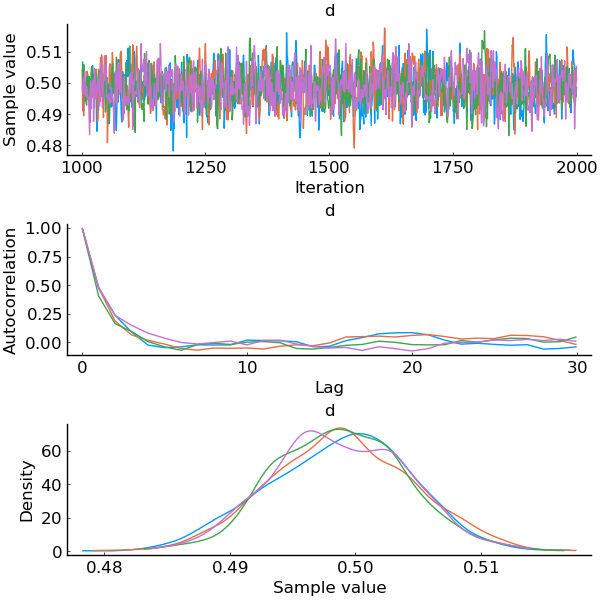

In [8]:
pyplot()
ch = group(chain, :d)
font_size = 12
p1 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:traceplot),
  grid=false, size=(250,100), titlefont=font(font_size))
p2 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:autocorplot),
  grid=false, size=(250,100), titlefont=font(font_size))
p3 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:mixeddensity),
  grid=false, size=(250,100), titlefont=font(font_size))
pcτ = plot(p1, p2, p3, layout=(3,1), size=(600,600))

### Posterior Predictive Distribution

The plot below shows mean reaction time across blocks for 100 posterior samples. Each red line is the mean retrieval failure time across the 8 blocks for a given posterior sample. Similarly, each black line is the mean reaction time for correct responses across blocks for a given posterior sample. As expected, both retrieval failures and successful retrievals become faster across blocks. Retrieval failures are slower on average than successful retrievals. In addition, it is clear that retrieval failures become less frequent across blocks.  

┌ Warning: You created n=200 groups... Is that intended?
└ @ RecipesPipeline /home/dfish/.julia/packages/RecipesPipeline/BY2Dd/src/group.jl:14


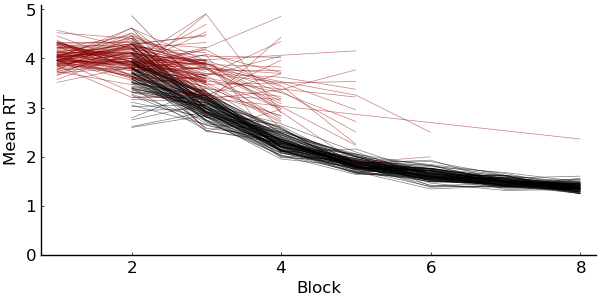

In [9]:
preds = posterior_predictive(x -> show_learning(all_stimuli, fixed_parms; x...), chain, 100)
preds = vcat(preds..., source=:rep)
groups = groupby(preds, [:rep,:retrieved,:block])
mean_rts = combine(groups, :rt=>mean=>:mean_rt)
sort!(mean_rts, [:rep,:block,:retrieved])
fmean_rts = filter(x->x.retrieved != :truncated, mean_rts)
p4 = @df fmean_rts plot(:block, :mean_rt, group=(:rep,:retrieved), xlabel="Block", ylabel="Mean RT", xaxis=font(12),
    yaxis=font(12), color=[:darkred :black], grid=false, size=(600,300), titlefont=font(12), linewidth=.5,
    labeltitle="Retrieved", legendtitlefontsize=8, ylims=(0,5.1), leg=false, alpha=.5)

In the plot below, mean accuracy across posterior samples increases over the course of eight blocks. Initially, accuracy is zero because the associative pairs are novel. You may have noticed that these predictions differ somewhat from the predictions in the standard ACT-R tutorial. As noted above, the reason for this difference is mostly due to the addition of noise to the retrieval threshold. Not only does this change the retrieval dynamics, but the mean time for retrieval failures increases with increasing values of noise. In addition, using normally distributed noise rather than logistically distributed noise for activation will cause the predictions to differ by some small amount because the logistic distribution has a heavier tail than the normal distribution. 

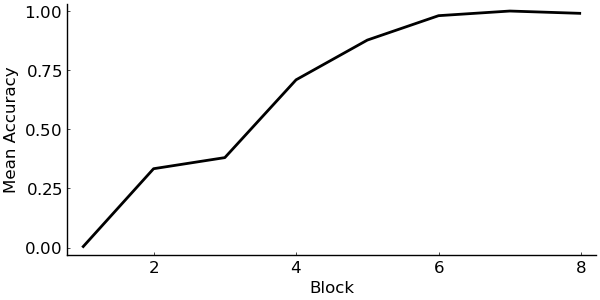

In [10]:
groups = groupby(preds, :block)
accuracy = combine(groups, :retrieved=>(x->mean(x .== :retrieved))=>:accuracy)
sort!(accuracy)
p5 = @df accuracy plot(:block, :accuracy, xlabel="Block", ylabel="Mean Accuracy", xaxis=font(12),
    yaxis=font(12), color=:black, grid=false, size=(600,300), titlefont=font(12), linewidth=2,
    leg=false, legendtitlefontsize=8)

# References

Fisher, C. R., Houpt, J., & Gunzelmann, G. (2018). A Comparison of Approximations for Base-Level Activation in ACT-R. Computational Brain & Behavior, 1(3-4), 228-236.

Petrov, A. A. (2006). Computationally efficient approximation of the base-level learning equation in ACT-R. In Proceedings of the seventh international conference on cognitive modeling (pp. 391-392). Edizioni Goliardiche: Trieste, ITA.